# Hyperopt - Sklearn Demo

In [1]:
import pandas as pd
import numpy as np
from hpsklearn import HyperoptEstimator, any_sparse_classifier, tfidf, any_classifier, any_preprocessing
from sklearn.datasets import load_iris, make_blobs, make_classification, load_digits
from sklearn import metrics
from hyperopt import tpe
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


## MNIST

In [7]:
from hpsklearn import HyperoptEstimator, any_classifier
from sklearn.datasets import fetch_mldata
from hyperopt import tpe
import numpy as np
seed = 2
# Download the data and split into training and test sets

digits = fetch_mldata('MNIST original')

X = digits.data
y = digits.target

X_small, _, y_small, _ = train_test_split(X,y,test_size=0.8,stratify=y)

X_train, X_test, y_train, y_test = train_test_split(X_small,y_small,test_size=0.4,stratify=y_small)

In [8]:
len(y_test)

5600

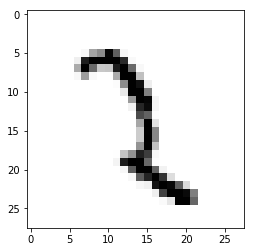

In [9]:
plt.imshow(X_train[2][:].reshape(28,28), cmap='Greys')

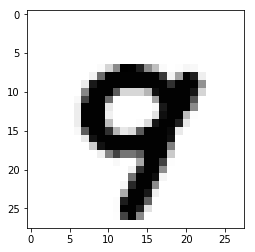

In [10]:
plt.imshow(X_train[1500][:].reshape(28,28), cmap='Greys')

## Default Values

In [11]:
rf = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()

In [12]:
#models = {'rf': rf, 'knn': knn, 'svc': svc}

models = {'rf': rf}

In [13]:
for key in models:
    model = models[key]
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print('{}:\t{}\t'. format(key, score))

rf:	0.9041071428571429	


In [15]:
from hpsklearn import random_forest, knn, svc
from hyperopt import hp

#clf = hp.choice('clf', [random_forest('rf'), svc('svc'), knn('knn')])

clf = hp.choice('clf', [random_forest('rf')])

In [16]:
estim = HyperoptEstimator( classifier=clf,  
                            algo=tpe.suggest, trial_timeout=60, max_evals=10)

In [17]:
#estim = HyperoptEstimator( classifier=any_classifier('clf'),  
#                            algo=tpe.suggest, trial_timeout=10)

In [18]:
%%time
estim.fit(X_train, y_train)

CPU times: user 1min, sys: 216 ms, total: 1min
Wall time: 7min 29s


In [19]:
estim.best_model()

{'ex_preprocs': (),
 'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1956, n_jobs=1,
             oob_score=False, random_state=4, verbose=False,
             warm_start=False),
 'preprocs': ()}

In [20]:
%%time
estim.score(X_test, y_test)

CPU times: user 3.44 s, sys: 24 ms, total: 3.46 s
Wall time: 2.98 s


0.95

In [326]:
rf = RandomForestClassifier()
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

In [325]:
rf.score(X_test, y_test)

0.9430357142857143

## Generate Data

In [174]:
data = make_classification(n_samples=1000, n_features=6, n_informative=4,
                           n_classes=3, class_sep=0.9, random_state=12)

In [175]:
df = pd.DataFrame(data[0], columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6'])
df['label'] = data[1]
df.head()

,x1,x2,x3,x4,x5,x6,label
0,0.886815,-1.354627,-0.265714,1.344991,0.343781,-2.421374,1
1,-1.896919,1.663153,1.983504,2.811323,1.917791,0.293907,0
2,1.393384,-0.971504,-0.408475,1.018195,-0.322737,-2.186892,0
3,-2.864604,-2.328869,-0.529579,-1.798538,2.245297,1.193141,1
4,1.055215,-1.462921,-0.839485,0.270326,-0.362412,-1.744271,2


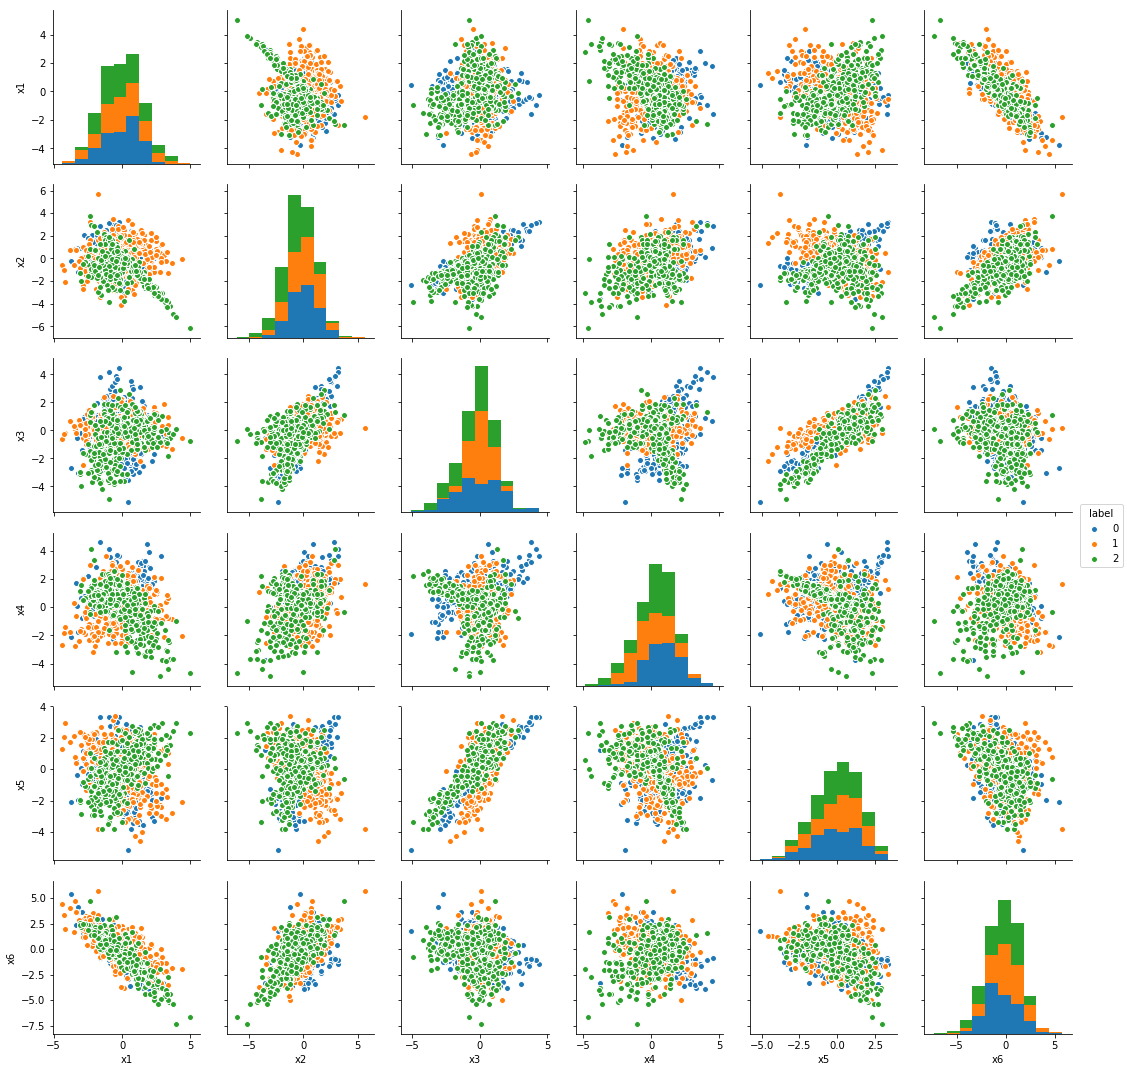

In [82]:
sns.pairplot(data=df, hue='label', vars=['x1', 'x2', 'x3', 'x4', 'x5', 'x6'])

In [176]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df.label,random_state=42)

In [177]:
lr = LogisticRegression()
dtree = DecisionTreeClassifier(random_state=10)
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()

In [178]:
models = {'lr': lr, 'dtree': dtree, 'rf': rf, 'knn': knn, 'svc': svc}

In [179]:
np.random.seed(10)

In [180]:
for key in models:
    model = models[key]
    scores = cross_val_score(model, X_train, y_train, cv = 10)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print('{}:\t{}\t +-\t {}'. format(key, np.round(mean_score, decimals=4), np.round(std_score, decimals=4)))

lr:	0.5438	 +-	 0.0358
dtree:	0.6974	 +-	 0.0519
rf:	0.737	 +-	 0.0516
knn:	0.7546	 +-	 0.0523
svc:	0.7877	 +-	 0.0394


## Standard GridSearch

In [182]:
# show params
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [188]:
param_grid = {'max_depth': [None] + list(range(1,10,1)),
             'min_samples_split': [2,4,6],
             'min_samples_leaf': [1,3,5],
             'max_features': [0.4,0.6,1.0]}

In [197]:
rf_gridSearch = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=4)

In [198]:
%%time
rf_gridSearch.fit(df.drop('label', axis=1), df.label)

CPU times: user 541 ms, sys: 8.78 ms, total: 550 ms
Wall time: 5.79 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5], 'max_features': [0.4, 0.6, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [199]:
pd.DataFrame(rf_gridSearch.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
234,0.020273,0.001122,0.784,0.954003,8,1,1,2,"{'max_depth': 8, 'max_features': 1.0, 'min_sam...",1,...,0.790,0.95750,0.793970,0.946317,0.768844,0.953808,0.000177,0.000018,0.028137,0.004101
23,0.020951,0.001254,0.784,0.949744,None,1,3,6,"{'max_depth': None, 'max_features': 1.0, 'min_...",1,...,0.790,0.95125,0.783920,0.948814,0.804020,0.962547,0.000398,0.000017,0.028111,0.007432
14,0.014841,0.001293,0.782,0.944248,None,0.6,3,6,"{'max_depth': None, 'max_features': 0.6, 'min_...",3,...,0.790,0.94250,0.783920,0.951311,0.758794,0.941323,0.000330,0.000095,0.018425,0.003779
10,0.015380,0.001274,0.781,0.983502,None,0.6,1,4,"{'max_depth': None, 'max_features': 0.6, 'min_...",4,...,0.780,0.98750,0.793970,0.980025,0.733668,0.981273,0.000148,0.000020,0.025002,0.003818
9,0.015426,0.001266,0.780,0.991499,None,0.6,1,2,"{'max_depth': None, 'max_features': 0.6, 'min_...",5,...,0.780,0.99000,0.778894,0.991261,0.758794,0.995006,0.000315,0.000019,0.025027,0.002155
247,0.011551,0.001141,0.779,0.914997,9,0.4,3,4,"{'max_depth': 9, 'max_features': 0.4, 'min_sam...",6,...,0.775,0.92750,0.783920,0.917603,0.778894,0.912609,0.000107,0.000011,0.036387,0.007067
258,0.013333,0.001151,0.779,0.893246,9,0.6,5,2,"{'max_depth': 9, 'max_features': 0.6, 'min_sam...",6,...,0.790,0.90375,0.793970,0.887640,0.793970,0.901373,0.000222,0.000023,0.021919,0.007661
0,0.015888,0.001571,0.779,0.990002,None,0.4,1,2,"{'max_depth': None, 'max_features': 0.4, 'min_...",6,...,0.770,0.98750,0.793970,0.987516,0.773869,0.990012,0.001353,0.000072,0.009407,0.002733
252,0.016730,0.001136,0.778,0.964252,9,0.6,1,2,"{'max_depth': 9, 'max_features': 0.6, 'min_sam...",9,...,0.750,0.96375,0.778894,0.965044,0.768844,0.958801,0.004165,0.000013,0.021526,0.003193
19,0.023249,0.001325,0.778,0.979248,None,1,1,4,"{'max_depth': None, 'max_features': 1.0, 'min_...",9,...,0.775,0.97000,0.788945,0.981273,0.778894,0.986267,0.001501,0.000117,0.021304,0.005286


## Hyperopt Sklearn

In [218]:
estim = HyperoptEstimator( classifier=any_classifier('clf'),
                            algo=tpe.suggest, trial_timeout=300, max_evals=200)

In [219]:
%%time
estim.fit(X_train.values, y_train.values)

CPU times: user 37.2 s, sys: 2.44 s, total: 39.6 s
Wall time: 12min 43s


In [220]:
estim.score(X_test, y_test)

0.804

In [221]:
estim.best_model()

{'ex_preprocs': (),
 'learner': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.001987587770275392, loss='deviance',
               max_depth=None, max_features='sqrt', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=241,
               n_iter_no_change=None, presort='auto', random_state=2,
               subsample=0.8741570481058805, tol=0.0001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 'preprocs': (Normalizer(copy=True, norm='l1'),)}

In [ ]:
# manual search for the decision tree
GridSearchCV(dtree)

In [44]:
X_pca = pca.fit_transform(iris_df.drop('target', axis=1))

In [48]:
iris_pca = pd.DataFrame(X_pca, columns=['pca_0', 'pca_1'])
iris_pca['target'] = iris_df.target
iris_pca.head()

,pca_0,pca_1,target
0,-2.684207,0.326607,setosa
1,-2.715391,-0.169557,setosa
2,-2.889820,-0.137346,setosa
3,-2.746437,-0.311124,setosa
4,-2.728593,0.333925,setosa


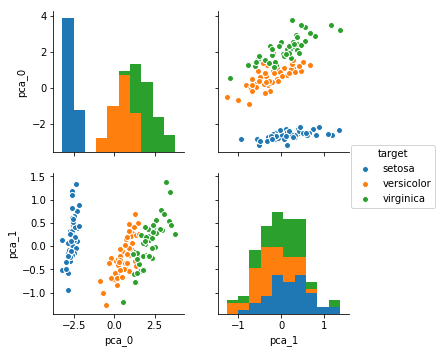

In [49]:
sns.pairplot(data=iris_pca, hue='target')

In [7]:
train = fetch_20newsgroups( subset='train' )
test = fetch_20newsgroups( subset='test' )
X_train = train.data
y_train = train.targetâ
X_test = test.data
y_test = test.target

In [12]:
estim = HyperoptEstimator(classifier=any_sparse_classifier('clf'), 
                            preprocessing=[tfidf('tfidf')],
                            algo=tpe.suggest, trial_timeout=60)

In [13]:
%%time
estim.fit( X_train, y_train )

ValueError: zero-dimensional arrays cannot be concatenated

In [237]:
from hpsklearn import HyperoptEstimator, any_sparse_classifier, tfidf
from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics
from hyperopt import tpe
import numpy as np

# Download the data and split into training and test sets

train = fetch_20newsgroups( subset='train' )
test = fetch_20newsgroups( subset='test' )
X_train = train.data
y_train = train.target
X_test = test.data
y_test = test.target

In [238]:
X_train

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 